<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Packages" data-toc-modified-id="Packages-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Packages</a></span></li><li><span><a href="#Barplot-config" data-toc-modified-id="Barplot-config-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Barplot config</a></span></li><li><span><a href="#Load-SUBTLEX-PT-excel-files" data-toc-modified-id="Load-SUBTLEX-PT-excel-files-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Load SUBTLEX-PT excel files</a></span></li></ul></li><li><span><a href="#Words-with-[p]-,-[m]-,-[lh]-and-[nh]" data-toc-modified-id="Words-with-[p]-,-[m]-,-[lh]-and-[nh]-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Words with [p] , [m] , [lh] and [nh]</a></span></li><li><span><a href="#Free-diphtong-words" data-toc-modified-id="Free-diphtong-words-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Free diphtong words</a></span></li><li><span><a href="#[lh]-and-[nh]" data-toc-modified-id="[lh]-and-[nh]-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>[lh] and [nh]</a></span><ul class="toc-item"><li><span><a href="#vowels" data-toc-modified-id="vowels-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>vowels</a></span></li><li><span><a href="#contiguous-left" data-toc-modified-id="contiguous-left-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>contiguous left</a></span></li><li><span><a href="#position" data-toc-modified-id="position-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>position</a></span></li><li><span><a href="#double-position" data-toc-modified-id="double-position-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>double position</a></span></li></ul></li></ul></div>

## Packages

In [1]:
import os
import re

import codecs
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import squarify 

import urllib

## Barplot config

In [2]:
sns.set(color_codes=True)

def show_values_on_bars_v(axs):
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2,y1 ,y2))
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() - 0.01 + p.get_width() / 2.
            _y = p.get_y() + p.get_height() * 1.02
            value = '{:.3f}%'.format(p.get_height()*100)
            ax.text(_x, _y+0.3, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
def show_values_on_bars_h(axs):
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2,y1 ,y2))
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() #+ 0.4
            _y = p.get_y() + p.get_height()
            value = '{:.3f}%'.format(p.get_width()*100)
            ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        

def show_values_on_bars_reg_v(axs):
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2,y1 ,y2 + 8))
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() - 0.01 + p.get_width() / 2.
            _y = p.get_y() + p.get_height() * 1.02
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y+0.3, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
def show_values_on_bars_reg_h(axs):
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2+8,y1 ,y2))
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() + 0.4
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_width())
            ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

## Load SUBTLEX-PT excel files

From http://p-pal.di.uminho.pt/about/databases

In [3]:
word_df = pd.read_excel("SUBTLEX-PT_Soares_et_al._QJEP.xlsx", sheet_name="SUBTLEX-PT")
syl_df = pd.read_excel("word_subtlex_syllabification.xlsx", sheet_name="subtlex_syllabification")
word_df = word_df.join(syl_df)
word_df

,Wordform,SUBTLEX_FREQcount,SUBTLEX_FREQmil,SUBTLEX_LOG10freq,SUBTLEXZipf,SUBTLEX_CDcount,SUBTLEX_CD%,SUBTLEX_LOG10CD,Nlett,Nsyll,P-PALfreq,PoS,Syllabifier
0,a,2877316,36879.3215,6.4590,7.5668,9220,0.5270,3.9648,1,1.0,39164.2643,"DET,PREP,PRON,N",a
1,à,173061,2218.1687,5.2382,6.3460,7020,0.4012,3.8464,1,1.0,5060.3402,"PREP+DET,PREP+PRON",à
2,aba,65,0.8331,1.8195,2.9207,43,0.0025,1.6435,3,2.0,1.0210,N,a•ba
3,abacate,64,0.8203,1.8129,2.9140,45,0.0026,1.6628,7,4.0,0.1856,N,a•ba•ca•te
4,abacateiro,3,0.0385,0.6021,1.5855,2,0.0001,0.4771,10,5.0,0.0098,N,a•ba•ca•tei•ro
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132705,zurzido,3,0.0385,0.6021,1.5855,3,0.0002,0.6021,7,3.0,0.1026,V,zur•zi•do
132706,zurzir,2,0.0256,0.4771,1.4082,1,0.0001,0.3010,6,2.0,0.6302,V,zur•zir
132707,zurzirem,1,0.0128,0.3010,1.1072,1,0.0001,0.3010,8,3.0,0.0244,V,zur•zi•rem
132708,zurziu,1,0.0128,0.3010,1.1072,1,0.0001,0.3010,6,2.0,0.2443,V,zur•ziu


# Words with [p] , [m] , [lh] and [nh]

In [4]:
p_m_nh_lh_dipth_stats_list = []
p_m_nh_lh_dipth_stats_list.append(["word_all",len(word_df),word_df["SUBTLEX_FREQcount"].sum()])
print("total words: " + str(word_df["SUBTLEX_FREQcount"].sum()))
print("total unique words: " + str(len(word_df)))

total words: 76474608
total unique words: 132710


In [5]:
word_p = word_df[word_df["Wordform"].str.contains("p")]
p_m_nh_lh_dipth_stats_list.append(["word_p",len(word_p),word_p["SUBTLEX_FREQcount"].sum()])
word_p

,Wordform,SUBTLEX_FREQcount,SUBTLEX_FREQmil,SUBTLEX_LOG10freq,SUBTLEXZipf,SUBTLEX_CDcount,SUBTLEX_CD%,SUBTLEX_LOG10CD,Nlett,Nsyll,P-PALfreq,PoS,Syllabifier
442,abespinhada,2,0.0256,0.4771,1.4082,2,0.0001,0.4771,11,5.0,0.0147,V,a•bes•pi•nha•da
443,abespinhe,1,0.0128,0.3010,1.1072,1,0.0001,0.3010,9,4.0,0.0049,V,a•bes•pi•nhe
911,abrupta,43,0.5511,1.6435,2.7412,38,0.0022,1.5911,7,3.0,1.7832,ADJ,a•brup•ta
912,abruptamente,57,0.7306,1.7634,2.8637,56,0.0032,1.7559,12,5.0,2.0909,ADV,a•brup•ta•men•te
913,abruptas,8,0.1025,0.9542,2.0107,8,0.0005,0.9542,8,3.0,0.4348,ADJ,a•brup•tas
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132634,zona-tampão,1,0.0128,0.3010,1.1072,1,0.0001,0.3010,10,4.0,0.3029,N,zo•na-•tam•pão
132652,zooplâncton,1,0.0128,0.3010,1.1072,1,0.0001,0.3010,11,4.0,0.0293,N,zo•o•plânc•ton
132656,zootrópio,5,0.0641,0.7782,1.8069,1,0.0001,0.3010,9,4.0,0.0049,N,zo•o•tró•pi•o
132697,zurrapa,19,0.2435,1.3010,2.3865,15,0.0009,1.2041,7,3.0,0.1661,N,zur•ra•pa


In [6]:
m_list = "m[aáàâãeéèêiíìoóòôõuúù]"
word_m = word_df[word_df["Wordform"].str.contains(m_list)]
p_m_nh_lh_dipth_stats_list.append(["word_m",len(word_m),word_m["SUBTLEX_FREQcount"].sum()])
word_m

,Wordform,SUBTLEX_FREQcount,SUBTLEX_FREQmil,SUBTLEX_LOG10freq,SUBTLEXZipf,SUBTLEX_CDcount,SUBTLEX_CD%,SUBTLEX_LOG10CD,Nlett,Nsyll,P-PALfreq,PoS,Syllabifier
27,abafamento,1,0.0128,0.3010,1.1072,1,0.0001,0.3010,10,5.0,0.0684,N,a•ba•fa•men•to
28,abafámos,1,0.0128,0.3010,1.1072,1,0.0001,0.3010,8,NaN,NaN,V,a•ba•fá•mos
41,abafemos,1,0.0128,0.3010,1.1072,1,0.0001,0.3010,8,NaN,NaN,V,a•ba•fe•mos
55,abaixamentos,1,0.0128,0.3010,1.1072,1,0.0001,0.3010,12,5.0,0.1172,N,a•bai•xa•men•tos
56,abaixamos,5,0.0641,0.7782,1.8069,4,0.0002,0.6990,9,4.0,0.0049,V,a•bai•xa•mos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132560,zigomático,24,0.3076,1.3979,2.4880,10,0.0006,1.0414,10,5.0,0.0049,ADJ,zi•go•má•ti•co
132590,zoássemos,1,0.0128,0.3010,1.1072,1,0.0001,0.3010,9,NaN,NaN,V,zo•ás•se•mos
132635,zoneamento,8,0.1025,0.9542,2.0107,7,0.0004,0.9031,10,5.0,0.0244,N,zo•ne•a•men•to
132636,zoneamentos,1,0.0128,0.3010,1.1072,1,0.0001,0.3010,11,5.0,0.0049,N,zo•ne•a•men•tos


In [7]:
word_lh = word_df[word_df["Wordform"].str.contains("lh")]
p_m_nh_lh_dipth_stats_list.append(["word_lh",len(word_lh),word_lh["SUBTLEX_FREQcount"].sum()])
word_lh

,Wordform,SUBTLEX_FREQcount,SUBTLEX_FREQmil,SUBTLEX_LOG10freq,SUBTLEXZipf,SUBTLEX_CDcount,SUBTLEX_CD%,SUBTLEX_LOG10CD,Nlett,Nsyll,P-PALfreq,PoS,Syllabifier
160,abandalhada,2,0.0256,0.4771,1.4082,2,0.0001,0.4771,11,5.0,0.0147,V,a•ban•da•lha•da
161,abandalhado,3,0.0385,0.6021,1.5855,3,0.0002,0.6021,11,5.0,0.0537,V,a•ban•da•lha•do
162,abandalhar,4,0.0513,0.6990,1.7101,3,0.0002,0.6021,10,4.0,0.0440,V,a•ban•da•lhar
163,abandalharmos,1,0.0128,0.3010,1.1072,1,0.0001,0.3010,13,5.0,0.0049,V,a•ban•da•lhar•mos
164,abandalhou,1,0.0128,0.3010,1.1072,1,0.0001,0.3010,10,NaN,NaN,V,a•ban•da•lhou
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131406,virilha,161,2.0636,2.2095,3.3146,95,0.0054,1.9823,7,3.0,0.3957,N,vi•ri•lha
131407,virilhas,48,0.6152,1.6902,2.7890,37,0.0021,1.5798,8,3.0,0.2785,N,vi•ri•lhas
132481,zarolha,23,0.2948,1.3802,2.4695,7,0.0004,0.9031,7,3.0,0.0195,"ADJ,N",za•ro•lha
132482,zarolho,78,0.9997,1.8976,2.9999,34,0.0019,1.5441,7,3.0,0.1808,"ADJ,N",za•ro•lho


In [8]:
word_lh_clitic = word_df[word_df["Wordform"].str.contains("^lhe$|^lhes$|^lho$|^lhos$|^lha$|^lhas$|.*\-lh.+")]
p_m_nh_lh_dipth_stats_list.append(["word_lh_clitic",len(word_lh_clitic),word_lh_clitic["SUBTLEX_FREQcount"].sum()])
word_lh_clitic

,Wordform,SUBTLEX_FREQcount,SUBTLEX_FREQmil,SUBTLEX_LOG10freq,SUBTLEXZipf,SUBTLEX_CDcount,SUBTLEX_CD%,SUBTLEX_LOG10CD,Nlett,Nsyll,P-PALfreq,PoS,Syllabifier
80787,lha,636,8.1518,2.8041,3.9113,414,0.0237,2.6180,3,1.0,4.6850,"PRON,PRON+PRON",lha
80791,lhas,130,1.6662,2.1173,3.2217,110,0.0063,2.0453,4,1.0,2.5795,"PRON+PRON,PRON",lhas
80792,lhe,135001,1730.3436,5.1303,6.2381,6802,0.3888,3.8327,3,1.0,1891.5087,PRON,lhe
80793,lhes,22833,292.6566,4.3586,5.4664,4776,0.2730,3.6792,4,1.0,507.4508,PRON,lhes
80794,lho,1174,15.0475,3.0700,4.1775,629,0.0360,2.7993,3,1.0,7.1912,"PRON+PRON,PRON",lho
80795,lhos,176,2.2558,2.2480,3.3533,148,0.0085,2.1732,4,1.0,3.7910,"PRON+PRON,PRON",lhos


In [9]:
word_nh = word_df[word_df["Wordform"].str.contains("nh")]
p_m_nh_lh_dipth_stats_list.append(["word_nh",len(word_nh),word_nh["SUBTLEX_FREQcount"].sum()])
word_nh

,Wordform,SUBTLEX_FREQcount,SUBTLEX_FREQmil,SUBTLEX_LOG10freq,SUBTLEXZipf,SUBTLEX_CDcount,SUBTLEX_CD%,SUBTLEX_LOG10CD,Nlett,Nsyll,P-PALfreq,PoS,Syllabifier
389,abelhinha,17,0.2179,1.2553,2.3383,14,0.0008,1.1761,9,4.0,0.0440,N,a•be•lhi•nha
429,aberraçãozinha,1,0.0128,0.3010,1.1072,1,0.0001,0.3010,14,6.0,0.0049,N,a•ber•ra•ção•zi•nha
442,abespinhada,2,0.0256,0.4771,1.4082,2,0.0001,0.4771,11,5.0,0.0147,V,a•bes•pi•nha•da
443,abespinhe,1,0.0128,0.3010,1.1072,1,0.0001,0.3010,9,4.0,0.0049,V,a•bes•pi•nhe
492,aboborinha,11,0.1410,1.0792,2.1492,9,0.0005,1.0000,10,5.0,0.0049,N,a•bo•bo•ri•nha
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132341,xaropezinho,1,0.0128,0.3010,1.1072,1,0.0001,0.3010,11,5.0,0.0049,N,xa•ro•pe•zi•nho
132397,xixizinho,2,0.0256,0.4771,1.4082,2,0.0001,0.4771,9,4.0,0.0098,N,xi•xi•zi•nho
132551,zé-povinho,1,0.0128,0.3010,1.1072,1,0.0001,0.3010,9,4.0,0.0879,N,zé-•po•vi•nho
132572,zinho,8,0.1025,0.9542,2.0107,5,0.0003,0.7782,5,NaN,NaN,"V,ADJ,N",zi•nho


In [10]:
word_nh_inhoa = word_df[word_df["Wordform"].str.contains(".*(inho|inha|inhos|inhas)$")]
word_nh_inhoa

/home/luis/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Wordform,SUBTLEX_FREQcount,SUBTLEX_FREQmil,SUBTLEX_LOG10freq,SUBTLEXZipf,SUBTLEX_CDcount,SUBTLEX_CD%,SUBTLEX_LOG10CD,Nlett,Nsyll,P-PALfreq,PoS,Syllabifier
389,abelhinha,17,0.2179,1.2553,2.3383,14,0.0008,1.1761,9,4.0,0.0440,N,a•be•lhi•nha
429,aberraçãozinha,1,0.0128,0.3010,1.1072,1,0.0001,0.3010,14,6.0,0.0049,N,a•ber•ra•ção•zi•nha
492,aboborinha,11,0.1410,1.0792,2.1492,9,0.0005,1.0000,10,5.0,0.0049,N,a•bo•bo•ri•nha
1118,acabadinha,13,0.1666,1.1461,2.2217,10,0.0006,1.0414,10,5.0,0.0782,ADJ,a•ca•ba•di•nha
1119,acabadinhas,4,0.0513,0.6990,1.7101,4,0.0002,0.6990,11,5.0,0.0293,ADJ,a•ca•ba•di•nhas
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132341,xaropezinho,1,0.0128,0.3010,1.1072,1,0.0001,0.3010,11,5.0,0.0049,N,xa•ro•pe•zi•nho
132397,xixizinho,2,0.0256,0.4771,1.4082,2,0.0001,0.4771,9,4.0,0.0098,N,xi•xi•zi•nho
132551,zé-povinho,1,0.0128,0.3010,1.1072,1,0.0001,0.3010,9,4.0,0.0879,N,zé-•po•vi•nho
132572,zinho,8,0.1025,0.9542,2.0107,5,0.0003,0.7782,5,NaN,NaN,"V,ADJ,N",zi•nho


In [11]:
word_nh_inhoa.to_csv('word_nh_inhoa.csv')

In [12]:
inho_no_dim = pd.read_csv("word_nh_not_diminutive.csv",index_col=0)
inho_no_dim

,Wordform,SUBTLEX_FREQcount,SUBTLEX_FREQmil,SUBTLEX_LOG10freq,SUBTLEXZipf,SUBTLEX_CDcount,SUBTLEX_CD%,SUBTLEX_LOG10CD,Nlett,Nsyll,P-PALfreq,PoS,Syllabifier
1353,acarinha,4,0.0513,0.6990,1.7101,4,0.0002,0.6990,8,4.0,0.3273,V,a•ca•ri•nha
1370,acarinho,1,0.0128,0.3010,1.1072,1,0.0001,0.3010,8,4.0,0.0195,V,a•ca•ri•nho
3298,adivinha,1752,22.4558,3.2438,4.3513,999,0.0571,3.0000,8,4.0,5.9552,"V,N",a•di•vi•nha
3322,adivinhas,106,1.3586,2.0294,3.1331,87,0.0050,1.9445,9,4.0,0.4153,"N,V",a•di•vi•nhas
3334,adivinho,227,2.9095,2.3579,3.4638,136,0.0078,2.1367,8,4.0,0.8110,"N,V",a•di•vi•nho
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131844,vizinhas,114,1.4612,2.0607,3.1647,90,0.0051,1.9590,8,3.0,8.0071,"ADJ,V,N",vi•zi•nhas
131845,vizinho,1572,20.1487,3.1967,4.3042,746,0.0426,2.8733,7,3.0,26.9085,"N,ADJ,V",vi•zi•nho
131846,vizinhos,2101,26.9291,3.3226,4.4302,1037,0.0593,3.0162,8,3.0,35.7461,"N,ADJ",vi•zi•nhos
132572,zinho,8,0.1025,0.9542,2.0107,5,0.0003,0.7782,5,NaN,NaN,"V,ADJ,N",zi•nho


In [13]:
word_nh_diminutive = word_nh_inhoa.merge(inho_no_dim, indicator=True, how='outer')
word_nh_diminutive = word_nh_diminutive[word_nh_diminutive['_merge'] == 'left_only']
p_m_nh_lh_dipth_stats_list.append(["word_nh_diminutive",len(word_nh_diminutive),word_nh_diminutive["SUBTLEX_FREQcount"].sum()])
word_nh_diminutive

,Wordform,SUBTLEX_FREQcount,SUBTLEX_FREQmil,SUBTLEX_LOG10freq,SUBTLEXZipf,SUBTLEX_CDcount,SUBTLEX_CD%,SUBTLEX_LOG10CD,Nlett,Nsyll,P-PALfreq,PoS,Syllabifier,_merge
0,abelhinha,17,0.2179,1.2553,2.3383,14,0.0008,1.1761,9,4.0,0.0440,N,a•be•lhi•nha,left_only
1,aberraçãozinha,1,0.0128,0.3010,1.1072,1,0.0001,0.3010,14,6.0,0.0049,N,a•ber•ra•ção•zi•nha,left_only
2,aboborinha,11,0.1410,1.0792,2.1492,9,0.0005,1.0000,10,5.0,0.0049,N,a•bo•bo•ri•nha,left_only
3,acabadinha,13,0.1666,1.1461,2.2217,10,0.0006,1.0414,10,5.0,0.0782,ADJ,a•ca•ba•di•nha,left_only
4,acabadinhas,4,0.0513,0.6990,1.7101,4,0.0002,0.6990,11,5.0,0.0293,ADJ,a•ca•ba•di•nhas,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,vozinha,36,0.4614,1.5682,2.6641,29,0.0017,1.4771,7,3.0,0.2345,N,vo•zi•nha,left_only
1915,vozinhas,5,0.0641,0.7782,1.8069,5,0.0003,0.7782,8,3.0,0.0293,N,vo•zi•nhas,left_only
1916,xaropezinho,1,0.0128,0.3010,1.1072,1,0.0001,0.3010,11,5.0,0.0049,N,xa•ro•pe•zi•nho,left_only
1917,xixizinho,2,0.0256,0.4771,1.4082,2,0.0001,0.4771,9,4.0,0.0098,N,xi•xi•zi•nho,left_only


In [14]:
p_m_nh_lh_dipth_stats = pd.DataFrame(p_m_nh_lh_dipth_stats_list, columns=["item","unique_words_length","total_words_length"])
p_m_nh_lh_dipth_stats

,item,unique_words_length,total_words_length
0,word_all,132710,76474608
1,word_p,28277,8285187
2,word_m,31908,10075188
3,word_lh,2862,937701
4,word_lh_clitic,6,159950
5,word_nh,4003,1363766
6,word_nh_diminutive,1744,93626


In [15]:
max_unique_words_length = p_m_nh_lh_dipth_stats["unique_words_length"].max()
max_total_words_length = p_m_nh_lh_dipth_stats["total_words_length"].max()

p_m_nh_lh_dipth_stats["unique_words_length"] = p_m_nh_lh_dipth_stats["unique_words_length"]/max_unique_words_length
p_m_nh_lh_dipth_stats["unique_words_length"] = p_m_nh_lh_dipth_stats["unique_words_length"].round(5)
p_m_nh_lh_dipth_stats["total_words_length"] = p_m_nh_lh_dipth_stats["total_words_length"]/max_total_words_length
p_m_nh_lh_dipth_stats["total_words_length"] = p_m_nh_lh_dipth_stats["total_words_length"].round(5)
p_m_nh_lh_dipth_stats.drop(index=p_m_nh_lh_dipth_stats.index[0], axis=0, inplace=True)
p_m_nh_lh_dipth_stats

,item,unique_words_length,total_words_length
1,word_p,0.21307,0.10834
2,word_m,0.24043,0.13175
3,word_lh,0.02157,0.01226
4,word_lh_clitic,0.00005,0.00209
5,word_nh,0.03016,0.01783
6,word_nh_diminutive,0.01314,0.00122


[Text(0.5, 0, 'Count'), Text(0, 0.5, '')]

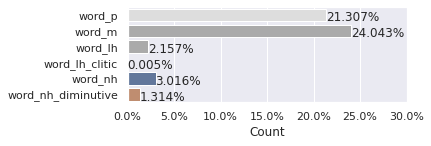

In [16]:
all_colors = {
    'word_all': '#dddddd',
    'word_p': '#aaaaaa',
    'word_m': '#aaaaaa',
    'word_lh': '#5975a4',
    'word_lh_clitic': '#5975a4',
    'word_nh': '#cc8963',
    'word_nh_diminutive': '#cc8963'
}

all_colors = list(all_colors.values())
sns.set_palette(sns.color_palette(all_colors))

fig, ax = plt.subplots()
ax = sns.barplot(x="unique_words_length", y="item" , data=p_m_nh_lh_dipth_stats)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1))
ax.set(xlim=(0, 0.3))
show_values_on_bars_h(ax)
fig.set_size_inches(5, 1.75)
ax.set(xlabel="Count", ylabel="")


[Text(0.5, 0, 'Count'), Text(0, 0.5, '')]

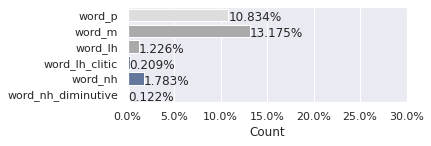

In [17]:
all_colors = {
    'word_all': '#dddddd',
    'word_p': '#aaaaaa',
    'word_m': '#aaaaaa',
    'word_lh': '#5975a4',
    'word_lh_clitic': '#5975a4',
    'word_nh': '#cc8963',
    'word_nh_diminutive': '#cc8963'
}

all_colors = list(all_colors.values())
sns.set_palette(sns.color_palette(all_colors))

fig, ax = plt.subplots()
ax = sns.barplot(x="total_words_length", y="item" , data=p_m_nh_lh_dipth_stats)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1))
ax.set(xlim=(0, 0.3))
show_values_on_bars_h(ax)
fig.set_size_inches(5, 1.75)
ax.set(xlabel="Count", ylabel="")

# Free diphtong words

In [18]:
dipht_free_list = []

dipht_free_ai = word_df[word_df["Syllabifier"].str.contains("ai")]
dipht_free_ei = word_df[word_df["Syllabifier"].str.contains("ei|éi")]
dipht_free_oi = word_df[word_df["Syllabifier"].str.contains("oi|ói")]
dipht_free_ou_or_oi = dipht_free_oi.copy()
dipht_free_ou_or_oi["Wordform"] = dipht_free_oi.replace(to_replace=r'oi', value='ou', regex=True)
dipht_free_ou = word_df[word_df["Wordform"].str.contains("ou")]
dipht_free_ou_or_oi = dipht_free_ou_or_oi[dipht_free_ou_or_oi['Wordform'].isin(list(dipht_free_ou["Wordform"]))]
dipht_free_ui = word_df[word_df["Syllabifier"].str.contains("ui")]
dipht_free_ui = dipht_free_ui[~dipht_free_ui["Syllabifier"].str.contains("gui|qui")]

dipht_free_list.append(["dipht_free_ai",len(dipht_free_ai),dipht_free_ai["SUBTLEX_FREQcount"].sum()])
dipht_free_list.append(["dipht_free_ei",len(dipht_free_ei),dipht_free_ei["SUBTLEX_FREQcount"].sum()])
dipht_free_list.append(["dipht_free_oi",len(dipht_free_oi),dipht_free_oi["SUBTLEX_FREQcount"].sum()])
dipht_free_list.append(["dipht_free_ou_or_oi",len(dipht_free_ou_or_oi),dipht_free_ou_or_oi["SUBTLEX_FREQcount"].sum()])
dipht_free_list.append(["dipht_free_ui",len(dipht_free_ui),dipht_free_ui["SUBTLEX_FREQcount"].sum()])

dipht_free_df = pd.DataFrame(dipht_free_list, columns=["item","unique_words_length","total_words_length"])
dipht_free_df

,item,unique_words_length,total_words_length
0,dipht_free_ai,2722,1065126
1,dipht_free_ei,8676,1559869
2,dipht_free_oi,690,832829
3,dipht_free_ou_or_oi,103,181635
4,dipht_free_ui,567,419903


In [19]:
dipht_free_df["unique_words_length"] = dipht_free_df["unique_words_length"]/max_unique_words_length
dipht_free_df["unique_words_length"] = dipht_free_df["unique_words_length"].round(5)
dipht_free_df["total_words_length"] = dipht_free_df["total_words_length"]/max_total_words_length
dipht_free_df["total_words_length"] = dipht_free_df["total_words_length"].round(5)

In [20]:
p_m_nh_lh_dipth_stats = p_m_nh_lh_dipth_stats.append(dipht_free_df)
p_m_nh_lh_dipth_stats = p_m_nh_lh_dipth_stats.reset_index(drop=True)
p_m_nh_lh_dipth_stats

,item,unique_words_length,total_words_length
0,word_p,0.21307,0.10834
1,word_m,0.24043,0.13175
2,word_lh,0.02157,0.01226
3,word_lh_clitic,0.00005,0.00209
4,word_nh,0.03016,0.01783
5,word_nh_diminutive,0.01314,0.00122
6,dipht_free_ai,0.02051,0.01393
7,dipht_free_ei,0.06538,0.02040
8,dipht_free_oi,0.00520,0.01089
9,dipht_free_ou_or_oi,0.00078,0.00238


[Text(0.5, 0, 'Count'), Text(0, 0.5, '')]

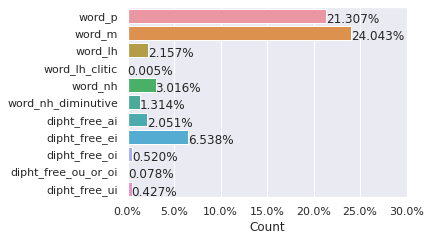

In [21]:
all_colors = {
    'word_all': '#dddddd',
    'word_p': '#aaaaaa',
    'word_m': '#aaaaaa',
    'word_lh': '#5975a4',
    'word_nh': '#cc8963',
    'diph_free_ai': '#e6cbcb',
    'diph_free_ei': '#c49299',
    #'i': '#9f8097',
    'diph_free_oi': '#594772',
    'diph_free_oi_or_ui': '#594772',
    'diph_free_ui': '#21314e'
}

all_colors = list(all_colors.values())
sns.set_palette(sns.color_palette(all_colors))
 
fig, ax = plt.subplots()
ax = sns.barplot(x="unique_words_length", y="item", data=p_m_nh_lh_dipth_stats)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1.0))
ax.set(xlim=(0, 0.3))
show_values_on_bars_h(ax)
fig.set_size_inches(5, 3.5)
ax.set(xlabel="Count", ylabel="")

[Text(0.5, 0, 'Count'), Text(0, 0.5, '')]

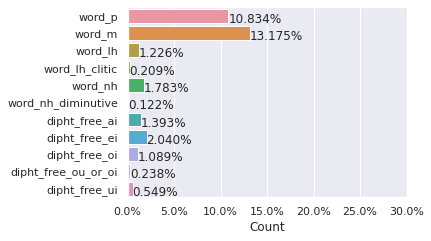

In [22]:
all_colors = {
    'word_all': '#dddddd',
    'word_p': '#aaaaaa',
    'word_m': '#aaaaaa',
    'word_lh': '#5975a4',
    'word_nh': '#cc8963',
    'diph_free_ai': '#e6cbcb',
    'diph_free_ei': '#c49299',
    #'i': '#9f8097',
    'diph_free_oi': '#594772',
    'diph_free_oi_or_ui': '#594772',
    'diph_free_ui': '#21314e'
}

all_colors = list(all_colors.values())
sns.set_palette(sns.color_palette(all_colors))
 
fig, ax = plt.subplots()
ax = sns.barplot(x="total_words_length", y="item", data=p_m_nh_lh_dipth_stats)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1.0))
ax.set(xlim=(0, 0.3))
show_values_on_bars_h(ax)
fig.set_size_inches(5, 3.5)
ax.set(xlabel="Count", ylabel="")

# [lh] and [nh]

## vowels

In [23]:
dipht_free_list = []
dipht_free_list.append(["a","_i",len(dipht_free_ai),dipht_free_ai["SUBTLEX_FREQcount"].sum()])
dipht_free_list.append(["e","_i",len(dipht_free_ei),dipht_free_ei["SUBTLEX_FREQcount"].sum()])
dipht_free_list.append(["i","_i",0,0])
dipht_free_list.append(["o","_i",len(dipht_free_oi),dipht_free_oi["SUBTLEX_FREQcount"].sum()])
dipht_free_list.append(["u","_i",len(dipht_free_ui),dipht_free_ui["SUBTLEX_FREQcount"].sum()])

dipht_free_df = pd.DataFrame(dipht_free_list, columns=["vowel","item","unique_words_length","total_words_length"])
dipht_free_df

,vowel,item,unique_words_length,total_words_length
0,a,_i,2722,1065126
1,e,_i,8676,1559869
2,i,_i,0,0
3,o,_i,690,832829
4,u,_i,567,419903


In [24]:
palatal_vowel_list = []

left_a_lh = word_df[word_df["Wordform"].str.contains("alh|álh|àlh|âlh")]
palatal_vowel_list.append(["a","_lh",len(left_a_lh),left_a_lh["SUBTLEX_FREQcount"].sum()])
left_e_lh = word_df[word_df["Wordform"].str.contains("elh|élh|èlh|êlh")]
palatal_vowel_list.append(["e","_lh",len(left_e_lh),left_e_lh["SUBTLEX_FREQcount"].sum()])
left_i_lh = word_df[word_df["Wordform"].str.contains("ilh|ílh|ìlh")]
palatal_vowel_list.append(["i","_lh",len(left_i_lh),left_i_lh["SUBTLEX_FREQcount"].sum()])
left_o_lh = word_df[word_df["Wordform"].str.contains("olh|ólh|òlh|ôlh")]
palatal_vowel_list.append(["o","_lh",len(left_o_lh),left_o_lh["SUBTLEX_FREQcount"].sum()])
left_u_lh = word_df[word_df["Wordform"].str.contains("ulh|úlh|ùlh")]
palatal_vowel_list.append(["u","_lh",len(left_u_lh),left_u_lh["SUBTLEX_FREQcount"].sum()])

left_a_nh = word_df[word_df["Wordform"].str.contains("anh|ánh|ành|ânh")]
palatal_vowel_list.append(["a","_nh",len(left_a_nh),left_a_nh["SUBTLEX_FREQcount"].sum()])
left_e_nh = word_df[word_df["Wordform"].str.contains("enh|énh|ènh|ênh")]
palatal_vowel_list.append(["e","_nh",len(left_e_nh),left_e_nh["SUBTLEX_FREQcount"].sum()])
left_i_nh = word_df[word_df["Wordform"].str.contains("inh|ính|ình")]
palatal_vowel_list.append(["i","_nh",len(left_i_nh),left_i_nh["SUBTLEX_FREQcount"].sum()])
left_o_nh = word_df[word_df["Wordform"].str.contains("onh|ónh|ònh|ônh")]
palatal_vowel_list.append(["o","_nh",len(left_o_nh),left_o_nh["SUBTLEX_FREQcount"].sum()])
left_u_nh = word_df[word_df["Wordform"].str.contains("unh|únh|ùnh")]
palatal_vowel_list.append(["u","_nh",len(left_u_nh),left_u_nh["SUBTLEX_FREQcount"].sum()])

palatal_vowel_df = pd.DataFrame(palatal_vowel_list, columns=["vowel","item","unique_words_length","total_words_length"])
palatal_vowel_df

,vowel,item,unique_words_length,total_words_length
0,a,_lh,906,174183
1,e,_lh,463,175705
2,i,_lh,758,165486
3,o,_lh,405,174071
4,u,_lh,322,88282
5,a,_nh,569,197685
6,e,_nh,410,443239
7,i,_nh,2469,564025
8,o,_nh,358,141751
9,u,_nh,210,17179


In [25]:
vowel_combo_df = pd.concat([dipht_free_df, palatal_vowel_df], axis= 0)
vowel_combo_df

,vowel,item,unique_words_length,total_words_length
0,a,_i,2722,1065126
1,e,_i,8676,1559869
2,i,_i,0,0
3,o,_i,690,832829
4,u,_i,567,419903
0,a,_lh,906,174183
1,e,_lh,463,175705
2,i,_lh,758,165486
3,o,_lh,405,174071
4,u,_lh,322,88282


In [26]:
df_count = vowel_combo_df[['vowel','item','unique_words_length']].groupby(['vowel','item']).sum().unstack()
df_count

unique_words_length           
item                   _i  _lh   _nh
vowel                               
a                    2722  906   569
e                    8676  463   410
i                       0  758  2469
o                     690  405   358
u                     567  322   210

In [27]:
df_count = df_count
norm_df = (df_count)/(df_count.sum())*100
norm_df

unique_words_length                      
item                   _i        _lh        _nh
vowel                                          
a               21.509285  31.744919  14.168327
e               68.557882  16.222845  10.209163
i                0.000000  26.559215  61.479084
o                5.452390  14.190610   8.914343
u                4.480443  11.282411   5.229084

[Text(0, 0, '_i'), Text(1, 0, '_lh'), Text(2, 0, '_nh')]

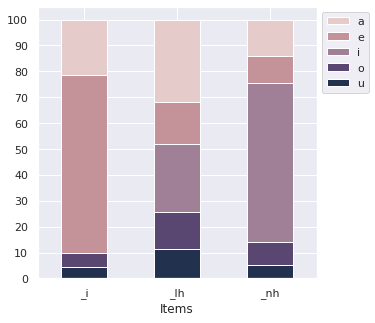

In [28]:
vowel_colors = {
    'a': '#e6cbcb',
    'e': '#c49299',
    'i': '#9f8097',
    'o': '#594772',
    'u': '#21314e'
}

vowel_order = list(vowel_colors.keys())


ax = norm_df.loc[reversed(vowel_order)].T.plot.bar(stacked=True,color = vowel_colors, figsize=(5,5), tick_label=['_i','_lh','_nh'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels),bbox_to_anchor=(1.0, 1.0))
ax.set( xlabel="Items")
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.set_xticklabels(list(norm_df['unique_words_length']),rotation=0)



In [29]:
df_count = vowel_combo_df[['vowel','item','total_words_length']].groupby(['vowel','item']).sum().unstack()
df_count

total_words_length                
item                  _i     _lh     _nh
vowel                                   
a                1065126  174183  197685
e                1559869  175705  443239
i                      0  165486  564025
o                 832829  174071  141751
u                 419903   88282   17179

In [30]:
df_count = df_count
norm_df = (df_count)/(df_count.sum())*100
norm_df

total_words_length                      
item                  _i        _lh        _nh
vowel                                         
a              27.467792  22.396419  14.494321
e              40.226375  22.592118  32.498411
i               0.000000  21.278161  41.354475
o              21.477247  22.382018  10.393224
u              10.828586  11.351284   1.259569

[Text(0, 0, '_i'), Text(1, 0, '_lh'), Text(2, 0, '_nh')]

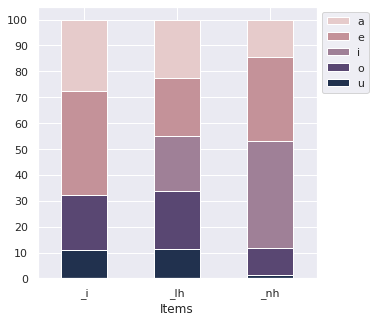

In [31]:
vowel_colors = {
    'a': '#e6cbcb',
    'e': '#c49299',
    'i': '#9f8097',
    'o': '#594772',
    'u': '#21314e'
}

vowel_order = list(vowel_colors.keys())


ax = norm_df.loc[reversed(vowel_order)].T.plot.bar(stacked=True,color = vowel_colors, figsize=(5,5), tick_label=['_i','_lh','_nh'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels),bbox_to_anchor=(1.0, 1.0))
ax.set( xlabel="Items")
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.set_xticklabels(list(norm_df['total_words_length']),rotation=0)



In [32]:
palatal_vowel_df

,vowel,item,unique_words_length,total_words_length
0,a,_lh,906,174183
1,e,_lh,463,175705
2,i,_lh,758,165486
3,o,_lh,405,174071
4,u,_lh,322,88282
5,a,_nh,569,197685
6,e,_nh,410,443239
7,i,_nh,2469,564025
8,o,_nh,358,141751
9,u,_nh,210,17179


In [33]:
palatal_vowel_df["unique_words_length"] = palatal_vowel_df["unique_words_length"]/max_unique_words_length
palatal_vowel_df["unique_words_length"] = palatal_vowel_df["unique_words_length"].round(5)
palatal_vowel_df["total_words_length"] = palatal_vowel_df["total_words_length"]/max_total_words_length
palatal_vowel_df["total_words_length"] = palatal_vowel_df["total_words_length"].round(5)
palatal_vowel_df

,vowel,item,unique_words_length,total_words_length
0,a,_lh,0.00683,0.00228
1,e,_lh,0.00349,0.00230
2,i,_lh,0.00571,0.00216
3,o,_lh,0.00305,0.00228
4,u,_lh,0.00243,0.00115
5,a,_nh,0.00429,0.00258
6,e,_nh,0.00309,0.00580
7,i,_nh,0.01860,0.00738
8,o,_nh,0.00270,0.00185
9,u,_nh,0.00158,0.00022


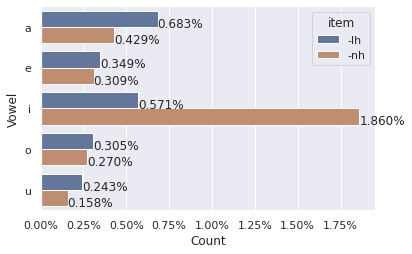

In [34]:
all_colors = {
    'word_lh': '#5975a4',
    'word_nh': '#cc8963'
}

all_colors = list(all_colors.values())
sns.set_palette(sns.color_palette(all_colors))

palatal_vowel_df["item"] = palatal_vowel_df["item"].str.replace('_', '-') # handles don't support "_"

fig, ax = plt.subplots()
ax = sns.barplot(x="unique_words_length", y="vowel",hue="item" , data=palatal_vowel_df)
handles, labels = ax.get_legend_handles_labels()
ax.set(xlabel="Count", ylabel="Vowel")

ax.xaxis.set_major_formatter(ticker.PercentFormatter(1))
show_values_on_bars_h(ax)

fig.set_size_inches(6,3.75)

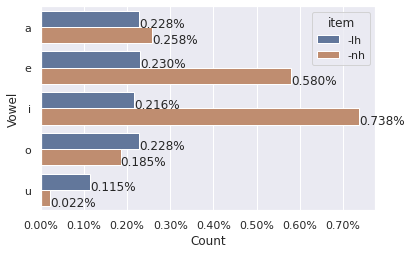

In [35]:
all_colors = {
    'word_lh': '#5975a4',
    'word_nh': '#cc8963'
}

all_colors = list(all_colors.values())
sns.set_palette(sns.color_palette(all_colors))

palatal_vowel_df["item"] = palatal_vowel_df["item"].str.replace('_', '-') # handles don't support "_"

fig, ax = plt.subplots()
ax = sns.barplot(x="total_words_length", y="vowel",hue="item" , data=palatal_vowel_df)
handles, labels = ax.get_legend_handles_labels()
ax.set(xlabel="Count", ylabel="Vowel")

ax.xaxis.set_major_formatter(ticker.PercentFormatter(1))
show_values_on_bars_h(ax)

fig.set_size_inches(6,3.75)

## contiguous left 

In [36]:
constiguous_left_list = []

dipht_lh = "ailh|iulh|uilh|eulh|éulh|eilh|éilh|oilh|óilh|aulh|oulh"
dipht_nh = "ainh|iunh|uinh|eunh|éunh|einh|éinh|oinh|óinh|aunh|ounh"
nasal_vowel_lh = "nlh|nnh|ãlh"
nasal_vowel_nh = "ãnh|õlh|õnh"

left_nasal_vowel_lh = word_df[word_df["Wordform"].str.contains(nasal_vowel_lh)]
constiguous_left_list.append(["left_nasal_vowel_lh",len(left_nasal_vowel_lh),left_nasal_vowel_lh["SUBTLEX_FREQcount"].sum()])
left_dipht_lh = word_df[word_df["Wordform"].str.contains(dipht_lh)]
left_dipht_lh = left_dipht_lh[~left_dipht_lh["Wordform"].str.contains("guilh|quilh|guelh|quelh")]
constiguous_left_list.append(["left_dipht_lh",len(left_dipht_lh),left_dipht_lh["SUBTLEX_FREQcount"].sum()])
left_rot_lh = word_df[word_df["Wordform"].str.contains("rlh")]
constiguous_left_list.append(["left_rot_lh",len(left_rot_lh),left_rot_lh["SUBTLEX_FREQcount"].sum()])
left_lat_lh = word_df[word_df["Wordform"].str.contains("llh")]
constiguous_left_list.append(["left_lat_lh",len(left_lat_lh),left_lat_lh["SUBTLEX_FREQcount"].sum()])


left_nasal_vowel_nh = word_df[word_df["Wordform"].str.contains(nasal_vowel_nh)]
constiguous_left_list.append(["left_nasal_vowel_nh",len(left_nasal_vowel_nh),left_nasal_vowel_nh["SUBTLEX_FREQcount"].sum()])
left_dipht_nh = word_df[word_df["Wordform"].str.contains(dipht_nh)]
#print(left_dipht_nh)
left_dipht_nh = left_dipht_nh[~left_dipht_nh["Wordform"].str.contains("guinh|quinh|guenh|quenh")]
constiguous_left_list.append(["left_dipht_nh",len(left_dipht_nh),left_dipht_nh["SUBTLEX_FREQcount"].sum()])
left_rot_nh = word_df[word_df["Wordform"].str.contains("rnh")]
constiguous_left_list.append(["left_rot_nh",len(left_rot_nh),left_rot_nh["SUBTLEX_FREQcount"].sum()])
left_lat_nh = word_df[word_df["Wordform"].str.contains("lnh")]
constiguous_left_list.append(["left_lat_nh",len(left_lat_nh),left_lat_nh["SUBTLEX_FREQcount"].sum()])

constiguous_left_df = pd.DataFrame(constiguous_left_list, columns=["item","unique_words_length","total_words_length"])
constiguous_left_df

,item,unique_words_length,total_words_length
0,left_nasal_vowel_lh,0,0
1,left_dipht_lh,0,0
2,left_rot_lh,0,0
3,left_lat_lh,0,0
4,left_nasal_vowel_nh,0,0
5,left_dipht_nh,61,7047
6,left_rot_nh,0,0
7,left_lat_nh,0,0


In [37]:
left_dipht_lh = left_dipht_lh[left_dipht_lh["Syllabifier"].str.contains("ai•lh|ei•lh|oi•lh|ui•lh")]
left_dipht_nh = left_dipht_nh[left_dipht_nh["Syllabifier"].str.contains("ai•nh|ei•nh|oi•nh|ni•lh")]

left_dipht_lh

,Wordform,SUBTLEX_FREQcount,SUBTLEX_FREQmil,SUBTLEX_LOG10freq,SUBTLEXZipf,SUBTLEX_CDcount,SUBTLEX_CD%,SUBTLEX_LOG10CD,Nlett,Nsyll,P-PALfreq,PoS,Syllabifier


In [38]:
left_dipht_nh

,Wordform,SUBTLEX_FREQcount,SUBTLEX_FREQmil,SUBTLEX_LOG10freq,SUBTLEXZipf,SUBTLEX_CDcount,SUBTLEX_CD%,SUBTLEX_LOG10CD,Nlett,Nsyll,P-PALfreq,PoS,Syllabifier


## position

In [39]:
initial_lh = word_df[word_df["Wordform"].str.contains("^lh")]
#initial_lh = len(initial_lh)
initial_nh = word_df[word_df["Wordform"].str.contains("^nh")]
#initial_nh = len(initial_nh)

In [40]:
initial_lh

,Wordform,SUBTLEX_FREQcount,SUBTLEX_FREQmil,SUBTLEX_LOG10freq,SUBTLEXZipf,SUBTLEX_CDcount,SUBTLEX_CD%,SUBTLEX_LOG10CD,Nlett,Nsyll,P-PALfreq,PoS,Syllabifier
80787,lha,636,8.1518,2.8041,3.9113,414,0.0237,2.6180,3,1.0,4.6850,"PRON,PRON+PRON",lha
80788,lhama,20,0.2563,1.3222,2.4087,11,0.0006,1.0792,5,2.0,0.0098,N,lha•ma
80789,lhamas,4,0.0513,0.6990,1.7101,3,0.0002,0.6021,6,2.0,0.0098,N,lha•mas
80790,lhaneza,1,0.0128,0.3010,1.1072,1,0.0001,0.3010,7,3.0,0.0147,N,lha•ne•za
80791,lhas,130,1.6662,2.1173,3.2217,110,0.0063,2.0453,4,1.0,2.5795,"PRON+PRON,PRON",lhas
80792,lhe,135001,1730.3436,5.1303,6.2381,6802,0.3888,3.8327,3,1.0,1891.5087,PRON,lhe
80793,lhes,22833,292.6566,4.3586,5.4664,4776,0.2730,3.6792,4,1.0,507.4508,PRON,lhes
80794,lho,1174,15.0475,3.0700,4.1775,629,0.0360,2.7993,3,1.0,7.1912,"PRON+PRON,PRON",lho
80795,lhos,176,2.2558,2.2480,3.3533,148,0.0085,2.1732,4,1.0,3.7910,"PRON+PRON,PRON",lhos


In [41]:
initial_nh

,Wordform,SUBTLEX_FREQcount,SUBTLEX_FREQmil,SUBTLEX_LOG10freq,SUBTLEXZipf,SUBTLEX_CDcount,SUBTLEX_CD%,SUBTLEX_LOG10CD,Nlett,Nsyll,P-PALfreq,PoS,Syllabifier


In [42]:
initial_list = []

initial_list.append(["initial_lh",len(initial_lh),initial_lh["SUBTLEX_FREQcount"].sum()])
initial_list.append(["initial_nh",len(initial_nh),initial_nh["SUBTLEX_FREQcount"].sum()])

df_initial = pd.DataFrame(initial_list, columns=["item","unique_words_length","total_words_length"])
df_initial

,item,unique_words_length,total_words_length
0,initial_lh,9,159975
1,initial_nh,0,0


In [43]:
initial_lh

,Wordform,SUBTLEX_FREQcount,SUBTLEX_FREQmil,SUBTLEX_LOG10freq,SUBTLEXZipf,SUBTLEX_CDcount,SUBTLEX_CD%,SUBTLEX_LOG10CD,Nlett,Nsyll,P-PALfreq,PoS,Syllabifier
80787,lha,636,8.1518,2.8041,3.9113,414,0.0237,2.6180,3,1.0,4.6850,"PRON,PRON+PRON",lha
80788,lhama,20,0.2563,1.3222,2.4087,11,0.0006,1.0792,5,2.0,0.0098,N,lha•ma
80789,lhamas,4,0.0513,0.6990,1.7101,3,0.0002,0.6021,6,2.0,0.0098,N,lha•mas
80790,lhaneza,1,0.0128,0.3010,1.1072,1,0.0001,0.3010,7,3.0,0.0147,N,lha•ne•za
80791,lhas,130,1.6662,2.1173,3.2217,110,0.0063,2.0453,4,1.0,2.5795,"PRON+PRON,PRON",lhas
80792,lhe,135001,1730.3436,5.1303,6.2381,6802,0.3888,3.8327,3,1.0,1891.5087,PRON,lhe
80793,lhes,22833,292.6566,4.3586,5.4664,4776,0.2730,3.6792,4,1.0,507.4508,PRON,lhes
80794,lho,1174,15.0475,3.0700,4.1775,629,0.0360,2.7993,3,1.0,7.1912,"PRON+PRON,PRON",lho
80795,lhos,176,2.2558,2.2480,3.3533,148,0.0085,2.1732,4,1.0,3.7910,"PRON+PRON,PRON",lhos


In [44]:
intermedial_list = []

intermedial_lh = word_lh[word_lh["Syllabifier"].str.contains("•lh[^•]+•")]
not_intermedial_lh = word_lh[word_lh["Syllabifier"].str.contains("•lh([^•])+-•se$")]
intermedial_lh_unique = len(intermedial_lh) - len(not_intermedial_lh)
intermedial_lh_total = intermedial_lh["SUBTLEX_FREQcount"].sum() - not_intermedial_lh["SUBTLEX_FREQcount"].sum()

intermedial_nh = word_nh[word_nh["Syllabifier"].str.contains("•nh[^•]+•")]
not_intermedial_nh = word_nh[word_nh["Syllabifier"].str.contains("•nh([^•])+-•se$")]
intermedial_nh_unique = len(intermedial_nh) - len(not_intermedial_nh)
intermedial_nh_total = intermedial_nh["SUBTLEX_FREQcount"].sum() - not_intermedial_nh["SUBTLEX_FREQcount"].sum()

intermedial_list.append(["intermedial_lh",intermedial_lh_unique,intermedial_lh_total])
intermedial_list.append(["intermedial_nh",intermedial_nh_unique,intermedial_nh_total])

df_intermedial = pd.DataFrame(intermedial_list, columns=["item","unique_words_length","total_words_length"])
df_intermedial

/home/luis/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,item,unique_words_length,total_words_length
0,intermedial_lh,1746,139532
1,intermedial_nh,1350,285272


In [45]:
final_list = []

final_lh = word_lh[word_lh["Syllabifier"].str.contains("•lh([^•])+$|•lh([^•])+-•se$")]
final_lh_unique = len(final_lh)
final_lh_total = final_lh["SUBTLEX_FREQcount"].sum()

final_nh = word_nh[word_nh["Syllabifier"].str.contains("•nh([^•])+$|•nh([^•])+-•se$")]
final_nh_unique = len(final_nh)
final_nh_total = final_nh["SUBTLEX_FREQcount"].sum()


final_list.append(["final_lh",final_lh_unique,final_lh_total])
final_list.append(["final_nh",final_nh_unique,final_nh_total])

df_final = pd.DataFrame(final_list, columns=["item","unique_words_length","total_words_length"])
df_final

/home/luis/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,item,unique_words_length,total_words_length
0,final_lh,1108,638195
1,final_nh,2674,1078699


In [46]:
df = pd.concat([df_initial, df_intermedial, df_final], axis= 0)
df

,item,unique_words_length,total_words_length
0,initial_lh,9,159975
1,initial_nh,0,0
0,intermedial_lh,1746,139532
1,intermedial_nh,1350,285272
0,final_lh,1108,638195
1,final_nh,2674,1078699


In [47]:
df["unique_words_length"] = df["unique_words_length"]/max_unique_words_length
df["unique_words_length"] = df["unique_words_length"].round(5)
df["total_words_length"] = df["total_words_length"]/max_total_words_length
df["total_words_length"] = df["total_words_length"].round(5)
df

,item,unique_words_length,total_words_length
0,initial_lh,0.00007,0.00209
1,initial_nh,0.00000,0.00000
0,intermedial_lh,0.01316,0.00182
1,intermedial_nh,0.01017,0.00373
0,final_lh,0.00835,0.00835
1,final_nh,0.02015,0.01411


[Text(0.5, 0, 'Count'), Text(0, 0.5, '')]

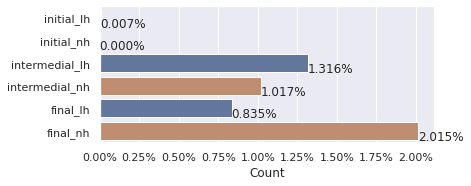

In [48]:
all_colors = {
    'word_lh': '#5975a4',
    'word_nh': '#cc8963'
}

all_colors = list(all_colors.values())
all_colors = all_colors*3
sns.set_palette(sns.color_palette(all_colors))
 

fig, ax = plt.subplots()
ax = sns.barplot(x="unique_words_length", y="item" , data=df)

ax.xaxis.set_major_formatter(ticker.PercentFormatter(1))
show_values_on_bars_h(ax)

fig.set_size_inches(6,2.5)

ax.set(xlabel="Count", ylabel="")

[Text(0.5, 0, 'Count'), Text(0, 0.5, '')]

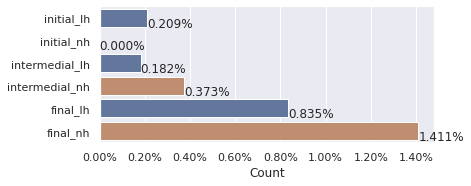

In [49]:
all_colors = {
    'word_lh': '#5975a4',
    'word_nh': '#cc8963'
}

all_colors = list(all_colors.values())
all_colors = all_colors*3
sns.set_palette(sns.color_palette(all_colors))
 

fig, ax = plt.subplots()
ax = sns.barplot(x="total_words_length", y="item" , data=df)

ax.xaxis.set_major_formatter(ticker.PercentFormatter(1))
show_values_on_bars_h(ax)

fig.set_size_inches(6,2.5)

ax.set(xlabel="Count", ylabel="")

## double position

In [50]:
double_nh = word_df[word_df["Wordform"].str.contains(".*nh.*nh.*")]
double_nh = double_nh[~double_nh["Wordform"].str.contains("\-")]

double_nh_no_inho_a = double_nh[~double_nh["Wordform"].str.contains("inho$|inha$")]

double_lh = word_df[word_df["Wordform"].str.contains(".*lh.*lh.*")]
double_lh = double_lh[~double_lh["Wordform"].str.contains("\-")]

double_list = []

double_list.append(["double_lh",len(double_lh),double_lh["SUBTLEX_FREQcount"].sum()])
double_list.append(["double_nh",len(double_nh),double_nh["SUBTLEX_FREQcount"].sum()])
double_list.append(["double_nh_no_inho_a",len(double_nh_no_inho_a),double_nh_no_inho_a["SUBTLEX_FREQcount"].sum()])

df_double = pd.DataFrame(double_list, columns=["item","unique_words_length","total_words_length"])
df_double

,item,unique_words_length,total_words_length
0,double_lh,1,1
1,double_nh,20,201
2,double_nh_no_inho_a,4,6


[Text(0.5, 0, 'Count'), Text(0, 0.5, '')]

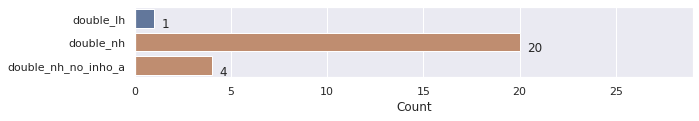

In [51]:
all_colors = ['#5975a4','#cc8963','#cc8963']
sns.set_palette(sns.color_palette(all_colors))

fig, ax = plt.subplots()
ax = sns.barplot(x="unique_words_length", y="item" , data=df_double)
show_values_on_bars_reg_h(ax)
fig.set_size_inches(10,1.3)
ax.set(xlabel="Count", ylabel="")

[Text(0.5, 0, 'Count'), Text(0, 0.5, '')]

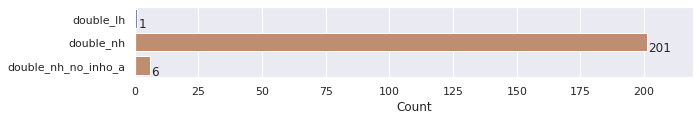

In [52]:
all_colors = ['#5975a4','#cc8963','#cc8963']
sns.set_palette(sns.color_palette(all_colors))

fig, ax = plt.subplots()
ax = sns.barplot(x="total_words_length", y="item" , data=df_double)
show_values_on_bars_reg_h(ax)
fig.set_size_inches(10,1.3)
ax.set(xlabel="Count", ylabel="")